In [22]:
with open('pico_swaes_testvectors.txt') as f:
    key = f.readline()[66:]
print(key)

0123456789abcdef123456789abcdef0



In [23]:
import numpy as np
b = bytes.fromhex(key)
key_array = np.frombuffer(b,dtype=np.uint8)
key_array

array([  1,  35,  69, 103, 137, 171, 205, 239,  18,  52,  86, 120, 154,
       188, 222, 240], dtype=uint8)

In [24]:
known_key = key_array

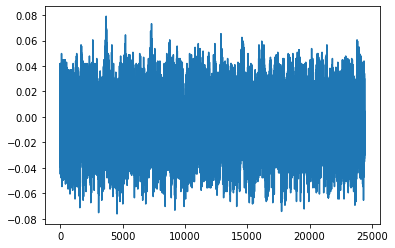

In [26]:
import numpy as np
import glob
trace_array_y = []
path = "measured_traces_146400/traces*.bin"
i = 0 
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-10:]):
    trace = np.fromfile(filename, dtype=np.float64)
    trace_array_y.append(trace)
    break
import matplotlib.pyplot as plt
plt.plot(trace_array_y[0])
#plt.savefig('1.jpg',dpi=100) # save jpg/png

In [6]:
byte3 = np.split(np.fromfile('cpa_byte 3.bin', dtype=np.float64),256)

In [8]:
byte14 = np.split(np.fromfile('cpa_byte14.bin', dtype=np.float64),256)

<Figure size 432x288 with 0 Axes>

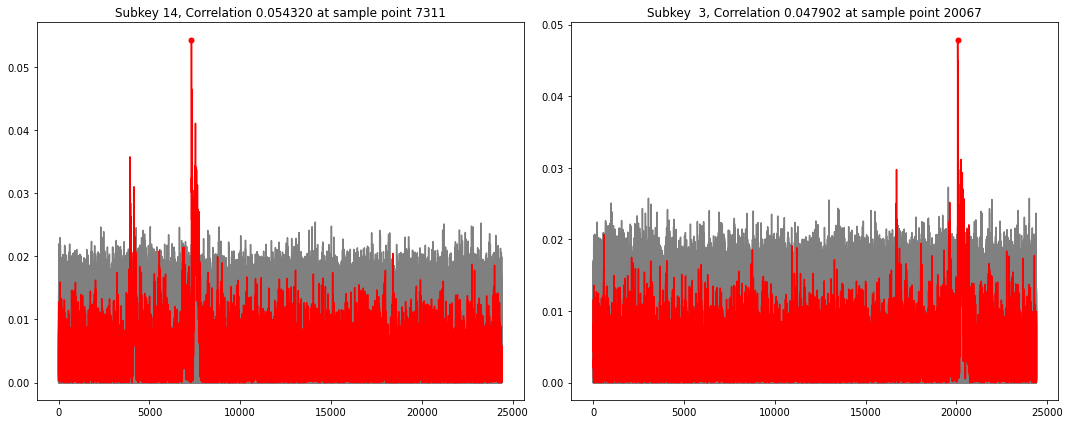

In [10]:
import pylab
plt.figure()
f, axs = plt.subplots(1,2,figsize=(15,6))

pylab.subplot(1,2,2)
subkey = 3
for guess in range(0, 256):
    if (guess == known_key[subkey]):
        plt.plot(abs(byte3[guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(byte3[guess]),color="grey")
corr = abs(byte3[known_key[subkey]])
xmax = np.argmax(corr)
ymax = corr.max()
plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))

pylab.subplot(1,2,1)
subkey = 14
for guess in range(0, 256):
    if (guess == known_key[subkey]):
        plt.plot(abs(byte14[guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(byte14[guess]),color="grey")
corr = abs(byte14[known_key[subkey]])
xmax = np.argmax(corr)
ymax = corr.max()
plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))

plt.tight_layout()

plt.savefig('2.jpg',dpi=100) # save jpg/png

In [30]:
byte9 = np.split(np.fromfile('cpa_byte 7.bin', dtype=np.float64),256)
byte13 = np.split(np.fromfile('cpa_byte11.bin', dtype=np.float64),256)
byte2 = np.split(np.fromfile('cpa_byte15.bin', dtype=np.float64),256)

<Figure size 432x288 with 0 Axes>

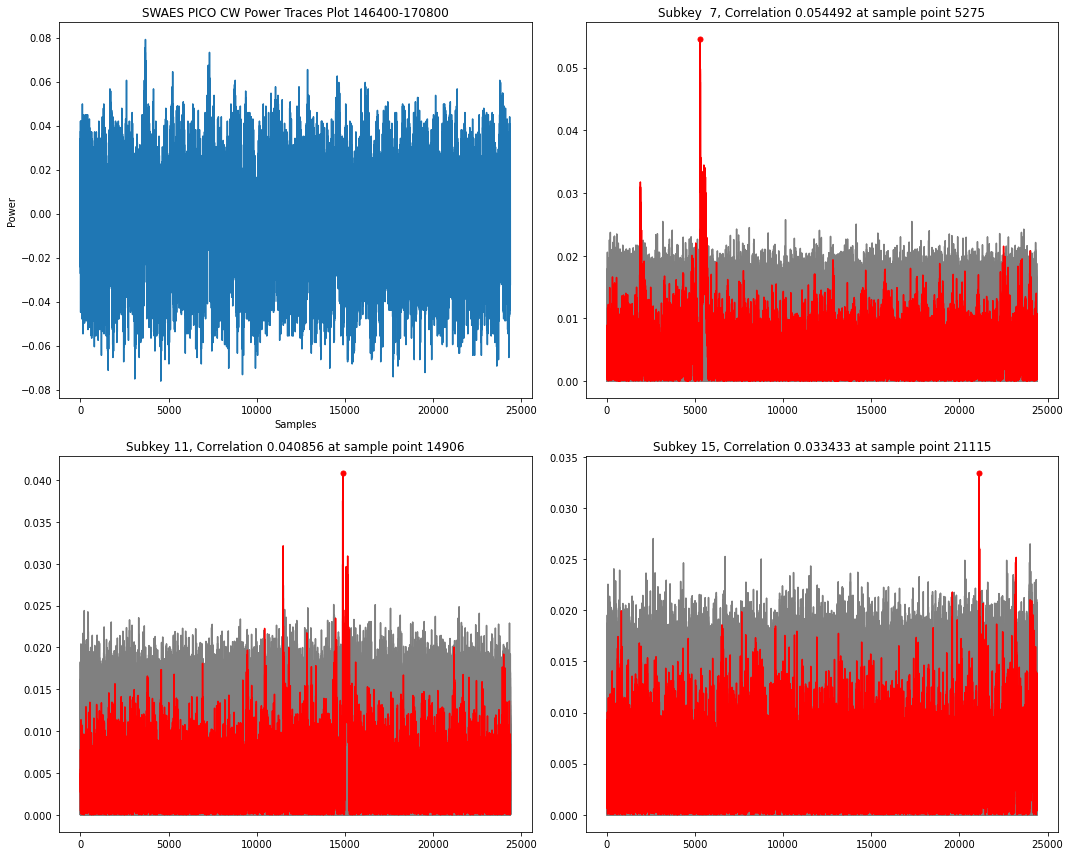

In [31]:
import pylab
plt.figure()
f, axs = plt.subplots(2,2,figsize=(15,12))

pylab.subplot(2,2,1)
plt.plot(trace_array_y[0])
plt.title('SWAES PICO CW Power Traces Plot 146400-170800')
plt.xlabel('Samples')
plt.ylabel('Power')

pylab.subplot(2,2,2)
subkey = 7
for guess in range(0, 256):
    if (guess == known_key[subkey]):
        plt.plot(abs(byte9[guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(byte9[guess]),color="grey")
corr = abs(byte9[known_key[subkey]])
xmax = np.argmax(corr)
ymax = corr.max()
plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))

pylab.subplot(2,2,3)
subkey = 11
for guess in range(0, 256):
    if (guess == known_key[subkey]):
        plt.plot(abs(byte13[guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(byte13[guess]),color="grey")
corr = abs(byte13[known_key[subkey]])
xmax = np.argmax(corr)
ymax = corr.max()
plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))

pylab.subplot(2,2,4)
subkey = 15
for guess in range(0, 256):
    if (guess == known_key[subkey]):
        plt.plot(abs(byte2[guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
    else:
        plt.plot(abs(byte2[guess]),color="grey")
corr = abs(byte2[known_key[subkey]])
xmax = np.argmax(corr)
ymax = corr.max()
plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))

plt.tight_layout()

plt.savefig('2.jpg',dpi=100) # save jpg/png